# Exploratory Data Analysis
This python notebook contains the questions asked during my EDA and graphs generated based on those questions.

In [60]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [61]:
# import datasets 
games = pd.read_csv("datasets/games.csv")
players = pd.read_csv("datasets/players.csv")
stats = pd.read_csv("datasets/stats.csv")
teams = pd.read_csv("datasets/teams.csv")

## What is the distribution of scores for home team vs visiting team?

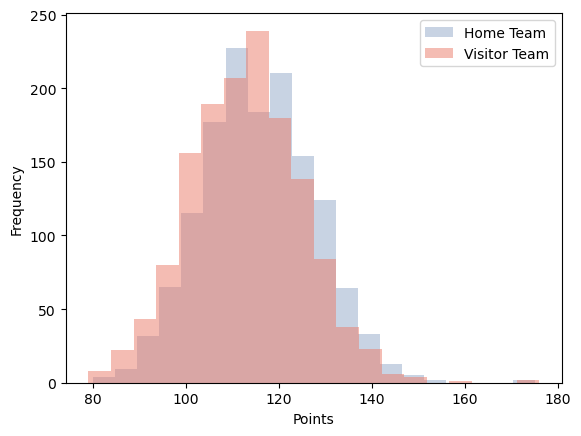

In [62]:
plt.hist(games[['home_team_score']], bins = 20, alpha = 0.5, label = "Home Team", color = '#93A9C8')
plt.hist(games[['visitor_team_score']], bins = 20, alpha = 0.5, label = "Visitor Team", color = '#EB7B69')
plt.legend()
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

In [63]:
print(games['home_team_score'].mean())
print(games['visitor_team_score'].mean())

115.63521126760564
112.9225352112676


The Home team score distribution is higher on the x axis than Visitor team score. We also can see from the means that the mean home team score is higher than visitor team score. 

## Which teams have the highest mean scores?

In [64]:
# average points per game by team

home_team_stats = games.groupby('home_team_abr').agg(
    total_points=pd.NamedAgg(column='home_team_score', aggfunc='sum'),
    total_games=pd.NamedAgg(column='home_team_score', aggfunc='count')
)
visitor_team_stats = games.groupby('visitor_team_abr').agg(
    total_points=pd.NamedAgg(column='visitor_team_score', aggfunc='sum'),
    total_games=pd.NamedAgg(column='visitor_team_score', aggfunc='count')
)
team_stats = home_team_stats.add(visitor_team_stats, fill_value=0)
team_stats['average_points'] = team_stats['total_points'] / team_stats['total_games']
team_stats.sort_values('average_points', ascending=False)
team_stats.rename_axis('team', inplace=True)
team_stats.sort_values('average_points', ascending = False).head()

,total_points,total_games,average_points
team,,,
SAC,11604,96,120.875000
GSW,12157,103,118.029126
ATL,10943,93,117.666667
UTA,10313,88,117.193182
MIL,10833,93,116.483871


## What is the correlation between average points and win/loss record?
## Correlation between average opponents points and win/loss record?
## Correlation between average score and average opponents score?

### Average points vs win/loss record

In [74]:
team_stats['wins'] = 0
team_stats['losses'] = 0

In [75]:
for index, row in games.iterrows():
    home_team = row['home_team_abr']
    visitor_team = row['visitor_team_abr']
    home_score = row['home_team_score']
    visitor_score = row['visitor_team_score']
    
    # Update win/loss count based on scores
    if home_score > visitor_score:
        team_stats.loc[home_team, 'wins'] += 1
        team_stats.loc[visitor_team, 'losses'] += 1
    else:
        team_stats.loc[home_team, 'losses'] += 1
        team_stats.loc[visitor_team, 'wins'] += 1

In [76]:
team_stats['win_pct'] = team_stats['wins'] / team_stats['total_games']


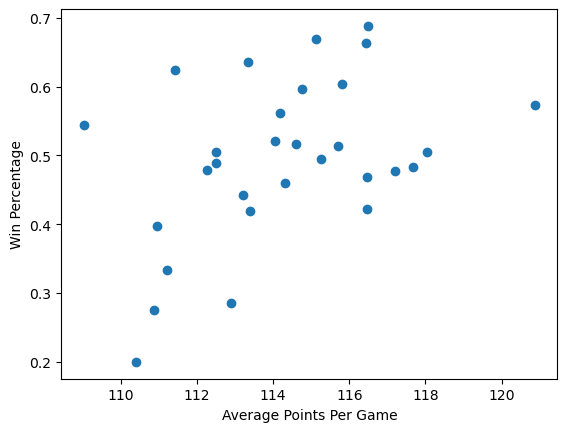

In [68]:
plt.scatter(team_stats['average_points'], team_stats['win_pct'])
plt.xlabel('Average Points Per Game')
plt.ylabel('Win Percentage')
plt.show()

### Average Opponents Points vs win/loss record

In [69]:
home_team_stats = games.groupby('home_team_abr').agg(
    total_points=pd.NamedAgg(column='home_team_score', aggfunc='sum'),
    total_games=pd.NamedAgg(column='home_team_score', aggfunc='count')
)
visitor_team_stats = games.groupby('visitor_team_abr').agg(
    total_points=pd.NamedAgg(column='visitor_team_score', aggfunc='sum'),
    total_games=pd.NamedAgg(column='visitor_team_score', aggfunc='count')
)
team_stats = home_team_stats.add(visitor_team_stats, fill_value=0)
team_stats['average_points'] = team_stats['total_points'] / team_stats['total_games']
team_stats.sort_values('average_points', ascending=False)
team_stats.rename_axis('team', inplace=True)
team_stats.sort_values('average_points', ascending = False).head()

,total_points,total_games,average_points
team,,,
SAC,11604,96,120.875000
GSW,12157,103,118.029126
ATL,10943,93,117.666667
UTA,10313,88,117.193182
MIL,10833,93,116.483871


In [70]:
home_op_points = games.groupby('visitor_team_abr').agg(
    total_points = pd.NamedAgg(column='home_team_score', aggfunc='sum')
)
visiting_op_points = games.groupby('home_team_abr').agg(
    total_points = pd.NamedAgg(column='visitor_team_score', aggfunc = 'sum')
)
op_stats = home_op_points.add(visiting_op_points, fill_value=0)
team_stats['opponent_total_points'] = op_stats

team_stats['opponent_avg_points'] = team_stats['opponent_total_points'] / team_stats['total_games']
team_stats.head()

,total_points,total_games,average_points,opponent_total_points,opponent_avg_points
team,,,,,
ATL,10943,93,117.666667,10993,118.204301
BKN,10687,95,112.494737,10695,112.578947
BOS,12459,107,116.439252,11865,110.887850
CHA,9675,87,111.206897,10201,117.252874
CHI,10329,92,112.271739,10248,111.391304


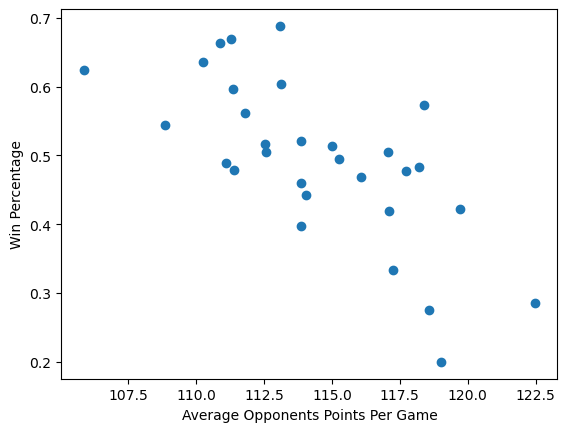

In [77]:
plt.scatter(team_stats['opponent_avg_points'], team_stats['win_pct'])
plt.xlabel('Average Opponents Points Per Game')
plt.ylabel('Win Percentage')
plt.show()

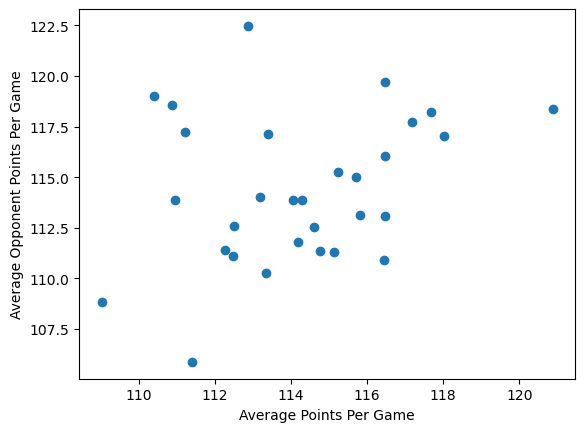

In [79]:
plt.scatter(team_stats['average_points'], team_stats['opponent_avg_points'])
plt.xlabel('Average Points Per Game')
plt.ylabel('Average Opponent Points Per Game')
plt.show()